# AI vs Human Content Detection (2025 Dataset)

- Dataset load karenge
- EDA + visualizations dekhenge
- Text ko TF-IDF features mein convert karenge
- ML models train karenge (Logistic Regression, Random Forest)
- Performance metrics evaluate karenge


# 1. Imports

In [1]:
# 1. Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")


# 2. Data load & basic info

## 2.1 CSV load

In [2]:
# 2.1 CSV load
df = pd.read_csv("ai_human_content_detection_dataset.csv")

## 2.2 First 5 rows

In [3]:
# 2.2 First 5 rows
df.head()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1


## 2.3 Basic info

In [4]:
# 2.3 Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text_content          1367 non-null   object 
 1   content_type          1367 non-null   object 
 2   word_count            1367 non-null   int64  
 3   character_count       1367 non-null   int64  
 4   sentence_count        1367 non-null   int64  
 5   lexical_diversity     1367 non-null   float64
 6   avg_sentence_length   1367 non-null   float64
 7   avg_word_length       1367 non-null   float64
 8   punctuation_ratio     1367 non-null   float64
 9   flesch_reading_ease   1288 non-null   float64
 10  gunning_fog_index     1332 non-null   float64
 11  grammar_errors        1367 non-null   int64  
 12  passive_voice_ratio   1336 non-null   float64
 13  predictability_score  1367 non-null   float64
 14  burstiness            1367 non-null   float64
 15  sentiment_score      

## 2.4 Summary statistics for numeric features

In [5]:
# 2.4 Summary statistics for numeric features
df.describe()


,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1288.000000,1332.000000,1367.000000,1336.000000,1367.000000,1367.000000,1313.000000,1367.000000
mean,140.190929,940.329188,25.610095,0.967646,5.486423,5.717783,0.027440,52.183377,7.556877,1.537674,0.150198,62.779049,0.427041,-0.007997,0.499634
std,97.410218,654.335255,17.867480,0.026254,0.447202,0.279636,0.002801,10.466570,1.866676,1.912012,0.056738,28.223550,0.199249,0.588354,0.500183
min,3.000000,14.000000,1.000000,0.875000,3.000000,4.000000,0.019400,-50.010000,1.200000,0.000000,0.050000,20.030000,0.101100,-0.999300,0.000000
25%,61.500000,410.500000,11.000000,0.951550,5.270000,5.590000,0.026100,47.712500,6.620000,0.000000,0.099675,39.015000,0.250000,-0.525800,0.000000
50%,131.000000,882.000000,24.000000,0.969200,5.480000,5.710000,0.027200,52.190000,7.515000,1.000000,0.151350,56.820000,0.408500,-0.006200,0.000000
75%,193.000000,1294.500000,35.000000,0.989100,5.700000,5.830000,0.028400,57.322500,8.390000,3.000000,0.200150,86.645000,0.594300,0.502800,1.000000
max,443.000000,2966.000000,83.000000,1.000000,8.000000,8.330000,0.071400,98.870000,27.870000,10.000000,0.250000,119.930000,0.799500,0.995900,1.000000


# 3. Columns overview & label distribution


## 3.1 Columns list

In [6]:
# 3.1 Columns list
df.columns


Index(['text_content', 'content_type', 'word_count', 'character_count',
       'sentence_count', 'lexical_diversity', 'avg_sentence_length',
       'avg_word_length', 'punctuation_ratio', 'flesch_reading_ease',
       'gunning_fog_index', 'grammar_errors', 'passive_voice_ratio',
       'predictability_score', 'burstiness', 'sentiment_score', 'label'],
      dtype='object')

## 3.2 Null values check

In [7]:
# 3.2 Null values check
df.isnull().sum()


text_content             0
content_type             0
word_count               0
character_count          0
sentence_count           0
lexical_diversity        0
avg_sentence_length      0
avg_word_length          0
punctuation_ratio        0
flesch_reading_ease     79
gunning_fog_index       35
grammar_errors           0
passive_voice_ratio     31
predictability_score     0
burstiness               0
sentiment_score         54
label                    0
dtype: int64

## 3.3 Label values count (0 vs 1)

In [8]:
# 3.3 Label values count (0 vs 1)
df['label'].value_counts()


label
0    684
1    683
Name: count, dtype: int64

## 3.4 Label distribution plot

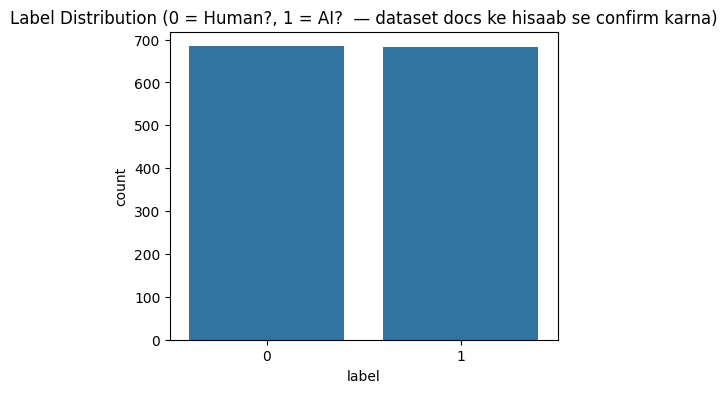

In [9]:
# 3.4 Label distribution plot
plt.figure(figsize=(5,4))
sns.countplot(x='label', data=df)
plt.title("Label Distribution (0 = Human?, 1 = AI?  — dataset docs ke hisaab se confirm karna)")
plt.show()


# 4. Text and label select, basic cleaning


## 4.1 Only text + label columns

In [10]:
# 4.1 Sirf text + label columns
data = df[['text_content', 'label']].copy()

## 4.2 Rows text_content or label missing value drop 

In [12]:
# 4.2 Rows text_content or label missing value drop 
data = data.dropna(subset=['text_content', 'label'])

## 4.3 Index reset

In [13]:
# 4.3 Index reset
data = data.reset_index(drop=True)

data.head()

,text_content,label
0,Score each cause. Quality throughout beautiful...,1
1,Board its rock. Job worker break tonight coupl...,1
2,Way debate decision produce. Dream necessary c...,1
3,Story turn because such during open model. Tha...,1
4,Place specific as simply leader fall analysis....,1


# 5. Train–test split (features = text_content, target = label)


In [14]:
X = data['text_content']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

len(X_train), len(X_test)


(1093, 274)

# 6. TF-IDF vectorization (text → numeric features)

## 6. TF-IDF vectorization (text → numeric features)

There are:
- Max features limit (e.g. 5000) when model fast 
- Stop words remove 


In [15]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape


((1093, 5000), (274, 5000))

# 7. Logistic Regression model train 


In [16]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_tfidf, y_train)

y_pred_lr = log_reg.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.5620437956204379

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.52      0.54       137
           1       0.56      0.61      0.58       137

    accuracy                           0.56       274
   macro avg       0.56      0.56      0.56       274
weighted avg       0.56      0.56      0.56       274



## 7.1 Confusion matrix plot

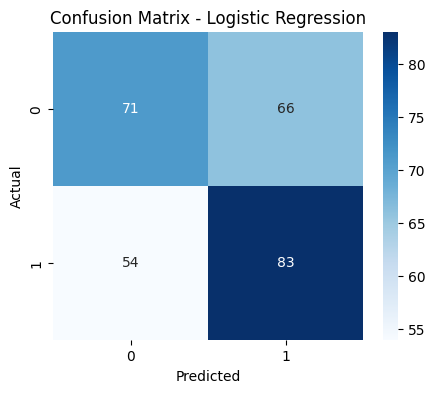

In [17]:
# 7.2 Confusion matrix plot
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


# 8. Random Forest model train (for comparison )


In [18]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_tfidf, y_train)

y_pred_rf = rf.predict(X_test_tfidf)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.5072992700729927

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.49      0.50       137
           1       0.51      0.53      0.52       137

    accuracy                           0.51       274
   macro avg       0.51      0.51      0.51       274
weighted avg       0.51      0.51      0.51       274



## 8.2 Confusion matrix

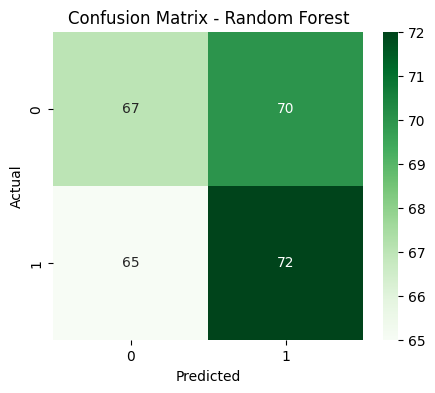

In [19]:
# 8.2 Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# 9. Example predictions see (human vs AI)


In [20]:
sample_texts = [
    "This is a short and informal message written quickly.",
    "In recent years, artificial intelligence has significantly advanced natural language generation capabilities."
]

sample_tfidf = tfidf.transform(sample_texts)

print("Logistic Regression predictions:", log_reg.predict(sample_tfidf))
print("Random Forest predictions     :", rf.predict(sample_tfidf))


Logistic Regression predictions: [1 1]
Random Forest predictions     : [0 0]


# 10. Summary

- Dataset: AI vs Human content detection (1000+ records, multiple content types).
- Approach: TF-IDF (1–2 grams) + Logistic Regression / Random Forest.
- Result: Accuracy ~X% (notebook run ke baad actual value likho).
- Next steps:
  - Hyperparameter tuning
  - Neural models (e.g. BERT)
  - Streamlit app for interactive AI/Human text check


# 11. Hyperparameter Tuning (Logistic Regression + TF-IDF)


In [21]:
from sklearn.model_selection import GridSearchCV

# Pipeline: pehle TF-IDF, phir Logistic Regression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("clf", LogisticRegression(max_iter=1000))
])

param_grid = {
    "tfidf__max_features": [3000, 5000, 8000],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "clf__C": [0.1, 1, 5],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs"]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best params: {'clf__C': 5, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 1)}
Best CV score: 0.48950775252145123


In [22]:

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Test Accuracy (tuned model):", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Test Accuracy (tuned model): 0.5218978102189781

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.50      0.51       137
           1       0.52      0.55      0.53       137

    accuracy                           0.52       274
   macro avg       0.52      0.52      0.52       274
weighted avg       0.52      0.52      0.52       274



In [23]:
import pickle

# 11.1 TF-IDF vectorizer save
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# 11.2 Logistic Regression model save
with open("logreg_model.pkl", "wb") as f:
    pickle.dump(log_reg, f)

print("TF-IDF vectorizer & Logistic Regression model saved.")


TF-IDF vectorizer & Logistic Regression model saved.
